In [97]:
#validation set= evaluates the performance of model on diffrent hyperparamter setting(externally set by user)like learning rate,hidden layers etc,.
#selects the set which gives best result on validation data. it generalises the model well.

In [98]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [99]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [100]:
print(x_test.shape)
print(x_train.shape)

(10000, 28, 28)
(60000, 28, 28)


In [101]:
x_train=x_train/255
x_test=x_test/255

In [121]:
model= Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='elu'))
model.add(Dense(64,activation='elu'))
model.add(Dense(32,activation='elu'))
model.add(Dense(10,activation='softmax'))

In [122]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 128)               100480    
                                                                 
 dense_23 (Dense)            (None, 64)                8256      
                                                                 
 dense_24 (Dense)            (None, 32)                2080      
                                                                 
 dense_25 (Dense)            (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [123]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [124]:
#model.fit(x_train,y_train,epochs=10)
train_model=model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 11s 6ms/step - loss: 0.2755 - accuracy: 0.9169 - val_loss: 0.1589 - val_accuracy: 0.9505
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1267 - accuracy: 0.9612 - val_loss: 0.1204 - val_accuracy: 0.9626
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0875 - accuracy: 0.9728 - val_loss: 0.1010 - val_accuracy: 0.9702
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0681 - accuracy: 0.9784 - val_loss: 0.1168 - val_accuracy: 0.9651
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0518 - accuracy: 0.9837 - val_loss: 0.0962 - val_accuracy: 0.9720
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0436 - accuracy: 0.9857 - val_loss: 0.0918 - val_accuracy: 0.9755
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0358 - accuracy: 0.9878 - val_loss: 0.0964 - val_accuracy

In [125]:
y_prob=model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [126]:
y_pred=y_prob.argmax(axis=1)#converts predicted probabilities into the final class labels

In [127]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9744

6


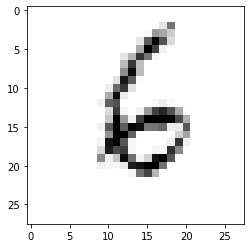

In [128]:
import matplotlib.pyplot as plt
plt.imshow(x_test[2000],cmap="Greys")
print(y_test[2000])

In [129]:
print(train_model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


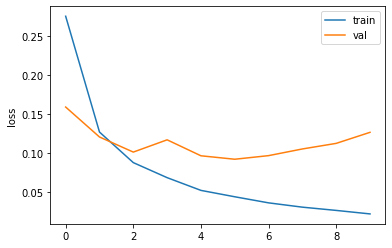

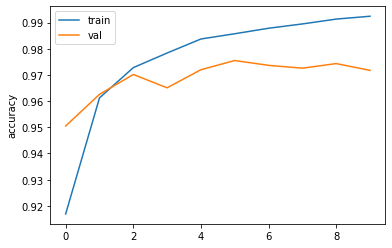

In [130]:
plt.plot(train_model.history['loss'], label='train')
plt.plot(train_model.history['val_loss'], label='val')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(train_model.history['accuracy'], label='train')
plt.plot(train_model.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.legend()
plt.show()
